Import packages

In [5]:
import xml.etree.ElementTree as ET
import numpy as np
import seaborn as sns

### COHERENCE SCORES
Create empty dictionary to store values of coherence scores and topics

In [ ]:
coh_means = {"n_topics":[], "coherence_score":[]}

Calculate coherence scores from the diagnostic files created by Mallet when fitting the LDA model for each number of topics. Store values in the previously created dictionary.

In [ ]:
for i in range(100,751,50):
    tree = ET.parse('../results/fine-scale/mallet-models/ENG-speaking-countries/'+str(i)+'-topics-diagnostics.xml')
    root = tree.getroot()

    #mean coherence
    coh_means["coherence_score"].append(np.mean([float(child.attrib['coherence']) for child in root]))
    coh_means["n_topics"].append(i)


Plot coherence scores against number of topics. The highest the coherence, the better. 

<AxesSubplot:xlabel='n_topics', ylabel='coherence_score'>

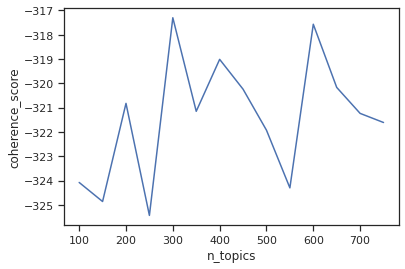

In [ ]:
sns.set_theme(style="ticks")

# Plot 
sns.lineplot(x="n_topics", y="coherence_score", data=coh_means)


Plotting coherence for UK-only data now

In [ ]:
coh_means_uk = {"n_topics":[], "coherence_score":[]}

for i in range(100,801,100):
    tree = ET.parse('../results/fine-scale/mallet-models/UK/'+str(i)+'-topics-diagnostics.xml')
    root = tree.getroot()

    #mean coherence
    coh_means["coherence_score"].append(np.mean([float(child.attrib['coherence']) for child in root]))
    coh_means["n_topics"].append(i)


Plot

In [ ]:
# Plot 
sns.lineplot(x="n_topics", y="coherence_score", data=coh_means_uk)


### Histogram of documents per topic

In [7]:
#read doc_topic_matrix
with open("/Users/flavia/Projects/Ongoing/Funding-Landscape/results/fine-scale/mallet-models/UK/800-topics-doc.txt","r") as f:
        txt = f.read().splitlines()


In [8]:
# get index + probability from list 'txt' above 
for (i,v) in enumerate(txt):
    # get number of each v starting from the 3rd position (index = 2), as the first is the index [0] and second [1]
    # is the project ID.
    txt[i] = [float(x) for x in v.split()[2:]]

In [9]:
# turn into numpy array
probs = np.array(txt)

In [15]:
doc_topics = np.argmax(probs, axis = 1).sort()

<AxesSubplot:>

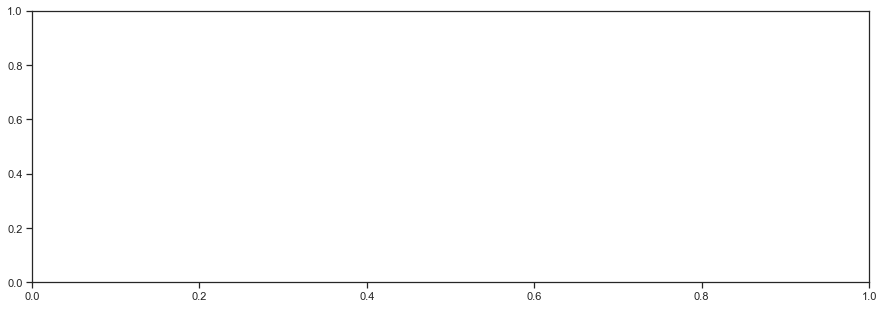

In [16]:
sns.set(rc={'figure.figsize':(15,5)})

sns.set_theme(style="ticks", font_scale=1.0)

sns.histplot(x=doc_topics, stat='density', common_norm=False, binwidth = 1)
